<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as scipy


#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [13]:
# type your code here
malaria=pd.read_csv('malaria.csv')
malaria.head(2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
malaria.info()
df=pd.DataFrame(malaria.isnull().sum()/malaria.shape[0],columns=['missing'])
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cases_Guinea         93 non-null     float64
 1   Cases_Liberia        83 non-null     float64
 2   Cases_SierraLeone    87 non-null     float64
 3   Cases_Nigeria        38 non-null     float64
 4   Cases_Senegal        25 non-null     float64
 5   Cases_UnitedStates   73 non-null     float64
 6   Cases_Spain          16 non-null     float64
 7   Cases_Mali           12 non-null     float64
 8   Deaths_Guinea        92 non-null     float64
 9   Deaths_Liberia       81 non-null     float64
 10  Deaths_SierraLeone   87 non-null     float64
 11  Deaths_Nigeria       38 non-null     float64
 12  Deaths_Senegal       22 non-null     float64
 13  Deaths_UnitedStates  57 non-null     float64
 14  Deaths_Spain         16 non-null     float64
 15  Deaths_Mali          12 non-null     flo

,missing
Cases_Guinea,0.267717
Cases_Liberia,0.346457
Cases_SierraLeone,0.314961
Cases_Nigeria,0.700787
Cases_Senegal,0.803150
Cases_UnitedStates,0.425197
Cases_Spain,0.874016
Cases_Mali,0.905512
Deaths_Guinea,0.275591
Deaths_Liberia,0.362205


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
df.loc[df['missing']>0.60].index

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
malaria.iloc[:,0:4].isnull().sum()

Cases_Guinea         34
Cases_Liberia        44
Cases_SierraLeone    40
Cases_Nigeria        89
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

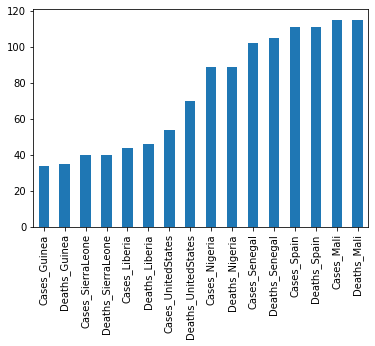

In [21]:
# type your code here
malaria.isnull().sum().sort_values().plot(kind='bar')

<AxesSubplot:>

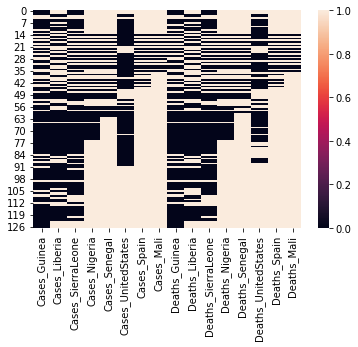

In [22]:
sns.heatmap(malaria.isnull())

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
updated_df=malaria.dropna(thresh=3)
updated_df

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
df.loc[df.missing>0.90].index
new= malaria.drop(['Cases_Mali', 'Deaths_Mali'],axis=1)
new

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

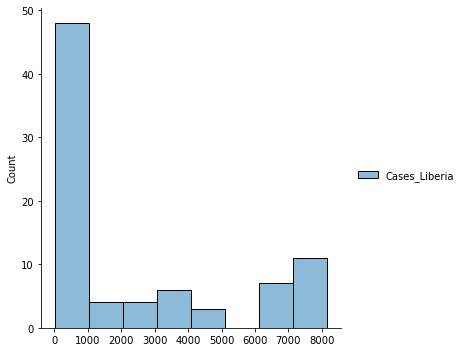

In [41]:
# type your code here
sns.displot(new.loc[:,['Cases_Liberia']])
new.Cases_Liberia.fillna(value=new.Cases_Liberia.median(),inplace=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

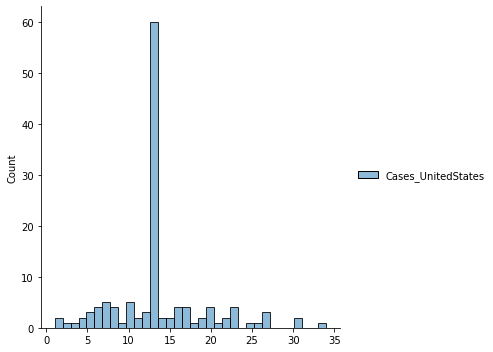

In [43]:
# type your code here
new['Cases_UnitedStates'].fillna(value=new['Cases_UnitedStates'].median(),inplace=True)
sns.displot(new.loc[:,['Cases_UnitedStates']])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here
new['Cases_Guinea'].fillna(new['Cases_Guinea'].median(),inplace=True)
new['Deaths_Guinea'].fillna(new['Deaths_Guinea'].median(),inplace=True)
new

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain
0,2776.0,516.0,10030.0,NaN,NaN,13.0,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN
1,2775.0,516.0,9780.0,NaN,NaN,13.0,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN
3,495.0,8157.0,NaN,NaN,NaN,10.0,NaN,360.5,3496.0,NaN,NaN,NaN,8.0,NaN
4,495.0,516.0,NaN,NaN,NaN,13.0,NaN,360.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,13.0,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN
123,86.0,516.0,NaN,NaN,NaN,13.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,516.0,NaN,NaN,NaN,13.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,516.0,NaN,NaN,NaN,13.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [51]:
house=pd.read_csv('house.csv')
house

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

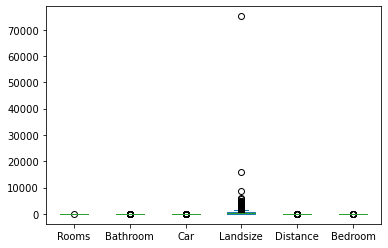

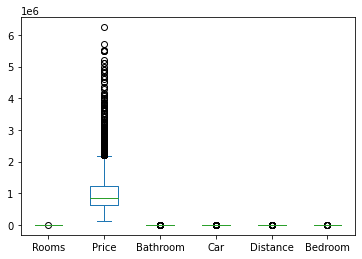

In [55]:
# type your code here
house.drop('Price',axis=1).plot(kind='box')
house.drop('Landsize',axis=1).plot(kind='box')
#rooms can be dropped

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
q1=house.Car.quantile(0.25)
q3=house.Car.quantile(0.75)

iqr=q3-q1

u=q3+1.5*iqr
l=q1-1.5*iqr

house.loc[house.Car>u,"Car"]

56      5
58      4
117     4
122     4
123     4
       ..
4585    4
4586    4
4588    4
4641    5
4690    4
Name: Car, Length: 206, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
house

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


<AxesSubplot:xlabel='Type', ylabel='Price'>

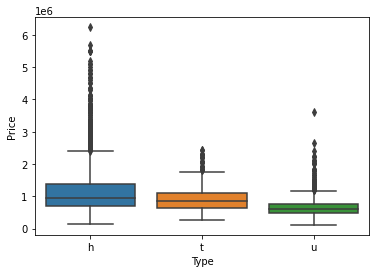

In [67]:
# type your code here
sns.boxplot(y=house['Price'],x=house['Type'])

#h categort is highly priced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    2145
4    1151
2    1042
5     226
1     156
6      35
7      10
8       1
Name: Rooms, dtype: int64

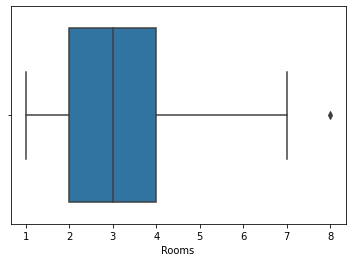

In [72]:
# type your code here
sns.boxplot(house['Rooms'])
house['Rooms'].value_counts()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom'>

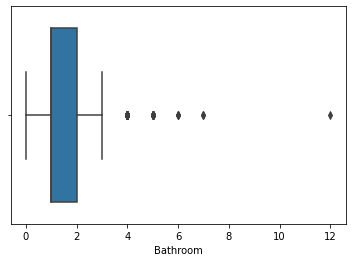

In [77]:
# type your code here
sns.boxplot(house['Bathroom'])


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
# type your code here
q1=house.Bedroom.quantile(0.25)
q3=house.Bedroom.quantile(0.75)

iqr=q3-q1

u=q3+1.5*iqr
l=q1-1.5*iqr

house.loc[house.Bedroom>u,:]


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# type your code here
q1=house.Distance.quantile(0.25)
q3=house.Distance.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*(iqr)
ll=q1-1.5*(iqr)
print(ul)
print(ll)
print("Mean before outlier removal",house.Distance.mean())
newdf=house.loc[(house['Distance']<ul) &(house['Distance']>ll),:]
after=newdf.Distance.mean()
print("Mean After outlier removal",newdf.Distance.mean())
diff=house.Distance.mean()-after
print('Difference=',diff)

30.75
7.950000000000001
Mean before outlier removal 19.32834662190515
Mean After outlier removal 19.311425554382247
Difference= 0.016921067522904565


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
# type your code here
q1=house.Price.quantile(0.25)
q3=house.Price.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*(iqr)
ll=q1-1.5*(iqr)
print(ul)
print(ll)
print("Mean before outlier removal",house.Price.mean())
newdf1=house.loc[(house['Price']<ul) &(house['Price']>ll),:]
after=newdf1.Price.mean()
print("Mean After outlier removal",newdf.Price.mean())
diff=house.Price.mean()
print('Difference=',diff)
newdf1

2180625.0
-316375.0
Mean before outlier removal 1019577.0480486781
Mean After outlier removal 1019356.0318901795
Difference= 1019577.0480486781


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [111]:
# type your code here


def bins(x):
    if (x>=5.0) & (x<15.0):
        return 'near'
    elif (x>=15.0) & (x<25.0):
        return "Far"
    else:
        return 'Extra Far'
house['dist_cat']=house['Distance'].apply(bins)
house

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,dist_cat
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,Extra Far
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,Far
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,Far
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,Far
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,Far
...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,Far
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,Far
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,Far
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,Far


In [104]:
4766/3

1588.6666666666667

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='dist_cat', ylabel='Price'>

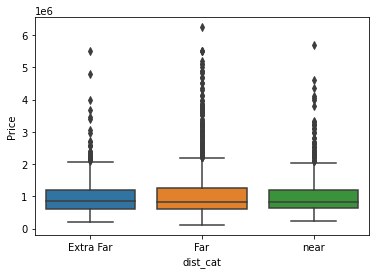

In [112]:
# type your code here
sns.boxplot(x='dist_cat',y='Price',data=house)

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here
from sklearn.model_selection import train_test_split as tts
x= house.drop('Price',axis=1)
y= house.Price
xtrain,xtest,ytrain,ytest=tts(x,y,random_state=420,test_size=0.20)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3812, 10)
(954, 10)
(3812,)
(954,)
